In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [175]:
data = pd.read_csv("data/GiveMeSomeCredit-training.csv")

In [176]:
data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [177]:
data.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [178]:
data.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [179]:
data = data.drop("Unnamed: 0", axis=1)

In [180]:
data[data['MonthlyIncome'].isnull()].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,29731.000000,29731.000000,29731.000000,29731.000000,29731.000000,0.0,29731.000000,29731.000000,29731.000000,29731.000000,25807.000000
mean,0.056137,6.649421,56.362349,0.579866,1673.396556,NaN,7.216071,0.484612,0.871481,0.452995,0.316310
std,0.230189,217.814854,15.438786,6.255361,4248.372895,NaN,4.842720,6.250408,1.034291,6.242076,0.809944
min,0.000000,0.000000,21.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.016027,46.000000,0.000000,123.000000,NaN,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.081697,57.000000,0.000000,1159.000000,NaN,6.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.440549,67.000000,0.000000,2382.000000,NaN,10.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,22198.000000,109.000000,98.000000,329664.000000,NaN,45.000000,98.000000,23.000000,98.000000,9.000000


In [181]:
data['MonthlyIncome'].describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

<Axes: xlabel='MonthlyIncome'>

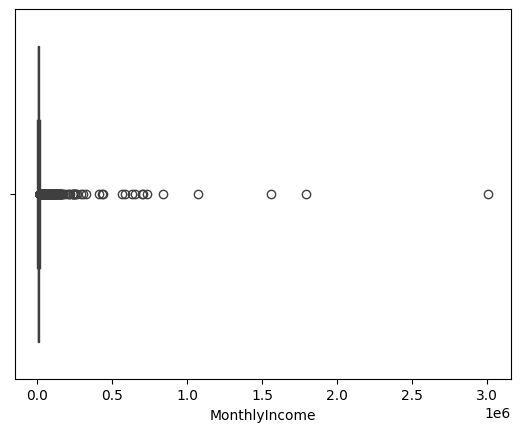

In [182]:
sns.boxplot(data, x="MonthlyIncome")

In [183]:
data[data['MonthlyIncome']==data['MonthlyIncome'].max()]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
73763,0,0.007328,52,0,0.00147,3008750.0,10,0,1,0,3.0


In [184]:
full_data = data.dropna()
target = 'MonthlyIncome'
predicted_data = [x for x in list(full_data) if x not in [target]]

X_data = full_data[predicted_data]
Y_data = full_data[target]
model = LinearRegression()
predict = model.fit(X_data, Y_data)
predict.score(X_data, Y_data)

0.022284132247520905

In [185]:
std_MonthlyIncome = data['MonthlyIncome'].std()
data['MonthlyIncome'] = data['MonthlyIncome'].fillna(std_MonthlyIncome)

In [186]:
data['MonthlyIncome'].isnull().sum()

np.int64(0)

In [187]:
data['NumberOfDependents'].describe()

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

<Axes: xlabel='NumberOfDependents'>

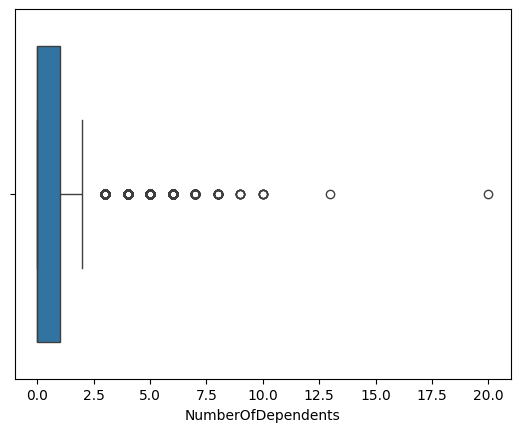

In [188]:
sns.boxplot(data, x="NumberOfDependents")

In [189]:
data[data['NumberOfDependents']==data['NumberOfDependents'].max()]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
6299,0,0.226616,40,1,0.576539,6316.0,11,2,1,0,20.0


In [190]:
data['NumberOfDependents'] = data['NumberOfDependents'].fillna(0)

Text(0.5, 1.0, 'SeriousDlqin2yrs1')

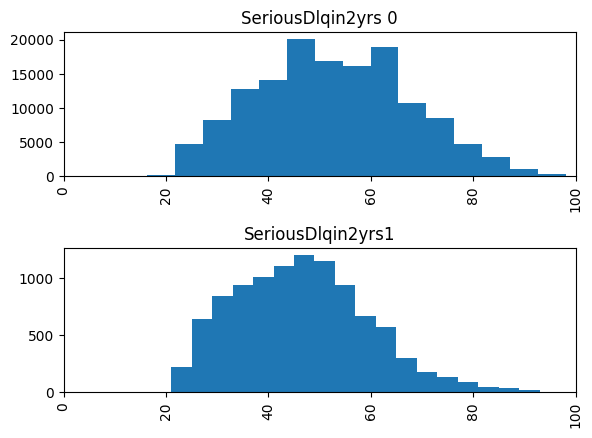

In [191]:
age_SeriousDlqin2yrs = data['age'].hist(by=data['SeriousDlqin2yrs'], bins = 20, layout=(2,1))
age_SeriousDlqin2yrs[0].set_xlim((0,100))
age_SeriousDlqin2yrs[0].set_title("SeriousDlqin2yrs 0")
age_SeriousDlqin2yrs[1].set_xlim((0,100))
age_SeriousDlqin2yrs[1].set_title("SeriousDlqin2yrs1")

In [192]:
data.DebtRatio.describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

In [198]:
data.DebtRatio.quantile([0.975])

0.975    3489.025
Name: DebtRatio, dtype: float64

In [199]:
data[data['DebtRatio'] > 0][['SeriousDlqin2yrs', 'MonthlyIncome']].describe()

,SeriousDlqin2yrs,MonthlyIncome
count,145887.000000,1.458870e+05
mean,0.066394,8.201404e+03
std,0.248970,1.329146e+04
min,0.000000,0.000000e+00
25%,0.000000,3.970000e+03
50%,0.000000,6.600000e+03
75%,0.000000,1.300000e+04
max,1.000000,3.008750e+06


In [195]:
data[(data['DebtRatio'] > 3489.025) & (data['SeriousDlqin2yrs'] == data['MonthlyIncome'])]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
90,0,0.039388,51,0,15466.0,0.0,7,0,0,0,0.0
326,0,0.013115,43,0,4211.0,0.0,21,0,2,0,2.0
508,0,1.000000,73,0,8500.0,0.0,2,0,0,0,0.0
844,0,0.734284,45,0,11311.0,0.0,6,0,2,1,0.0
3370,0,1.000000,45,0,9260.0,0.0,7,0,4,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
147094,0,0.042575,46,0,3966.0,0.0,13,0,2,0,2.0
147286,0,0.179077,56,0,4630.0,0.0,6,0,2,0,2.0
147424,0,0.248989,64,0,4053.0,0.0,16,0,2,0,0.0
147523,0,0.666509,50,0,4351.0,0.0,12,0,2,0,2.0


In [206]:
removed_debt = data.drop(data[data['DebtRatio'] > 3489.025].index)
removed_debt = removed_debt.fillna(removed_debt.median)

In [207]:
data.groupby('NumberOfTimes90DaysLate').NumberOfTimes90DaysLate.count()

NumberOfTimes90DaysLate
0     141662
1       5243
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       264
Name: NumberOfTimes90DaysLate, dtype: int64

In [208]:
data[data['NumberOfTimes90DaysLate']>17][['SeriousDlqin2yrs','NumberOfTime60-89DaysPastDueNotWorse',
                                          'NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate']].describe()

,SeriousDlqin2yrs,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate
count,269.000000,269.000000,269.000000,269.000000
mean,0.546468,97.962825,97.962825,97.962825
std,0.498764,0.270628,0.270628,0.270628
min,0.000000,96.000000,96.000000,96.000000
25%,0.000000,98.000000,98.000000,98.000000
50%,1.000000,98.000000,98.000000,98.000000
75%,1.000000,98.000000,98.000000,98.000000
max,1.000000,98.000000,98.000000,98.000000


In [213]:
data_us = removed_debt.drop(removed_debt[removed_debt['RevolvingUtilizationOfUnsecuredLines'] > 10].index)
data_98 = data_us.copy()
data_98.loc[data_98['NumberOfTime30-59DaysPastDueNotWorse'] > 90, 'NumberOfTime30-59DaysPastDueNotWorse'] = 18
data_98.loc[data_98['NumberOfTime60-89DaysPastDueNotWorse'] > 90, 'NumberOfTime60-89DaysPastDueNotWorse'] = 18
data_98.loc[data_98['NumberOfTimes90DaysLate'] > 90, 'NumberOfTimes90DaysLate'] = 18

In [1]:
class CreateModel():
    def __init__(self, target):
        self.target = target
        self.datasets = {}
        self.models = {}
        self.cache = {}
        
    def addModel(self, name, model):
        self.models[name] = model
        
    def addDatasets(self, name, data):
        self.datasets[name] = data

    def clearModels(self):
        self.models = {}

    def clearDatasets(self):
        self.models = {}

    def workData(self, m_name, dt_name, cv):
        if (m_name, dt_name, cv) in self.cache:
            return self.cache[(m_name, dt_name, cv)]

        data = self.datasets[dt_name]
        model = self.models[m_name]

        X = data.drop(self.target, axis=1)
        Y = data[self.target]

        cr_val = cross_validate(model, X, Y, scoring=['roc_auc'], cv=cv, n_jobs=-1)
        self.cache[(m_name, dt_name, cv)] = cr_val
        return cr_val

    def run(self, cv=10):
        scores = {}

        for model in self.models:
            for data in self.datasets:

                predict = self.workData(model, data, cv)
                scores[(model, data, cv)] = predict
            
        print('--- Top 10 Results ---')
        for score in sorted(scores.items(), key=lambda x: -1 * x[1]['test_roc_auc'].mean())[:10]:
            auc = score[1]['test_roc_auc']
            print("%s --> AUC: %0.4f (+/- %0.4f)" % (str(score[0]), auc.mean(), auc.std()))

    def save_model(self, m_name, filename):
        model = self.models[m_name]
        with open(filename, 'wb') as f:
            pickle.dump(model, f)
        print(f'Model {model_name} saved to {filename}.')

    def load_model(self, filename):
        with open(filename, 'rb') as f:
            model = pickle.load(f)
        return model

In [99]:
test = CreateModel("SeriousDlqin2yrs")

test.addDatasets('Drop Missing', data.dropna())

rfc = RandomForestClassifier(n_estimators=30, max_depth = 4, random_state=0)
test.addModel('Simple Random Forest', rfc)
test.addModel('Simple SVM', svm.LinearSVC())

test.run()

--- Top 10 Results ---
('Simple Random Forest', 'Drop Missing', 10) --> AUC: 0.8542 (+/- 0.0048)
('Simple SVM', 'Drop Missing', 10) --> AUC: 0.6938 (+/- 0.0073)


In [86]:
test.addDatasets('Median Fill', data.fillna(data.median()))
test.addDatasets('Median Fill, Outliers Removed', removed_debt)
test.addDatasets('Removed 98s', data_98)
test.addDatasets('Removed utilization outliers', data_us)

test.run()

--- Top 10 Results ---
('Simple Random Forest', 'Removed 98s', 10) --> AUC: 0.8559 (+/- 0.0050)
('Simple Random Forest', 'Removed utilization outliers', 10) --> AUC: 0.8559 (+/- 0.0050)
('Simple Random Forest', 'Median Fill, Outliers Removed', 10) --> AUC: 0.8557 (+/- 0.0043)
('Simple Random Forest', 'Drop Missing', 10) --> AUC: 0.8542 (+/- 0.0048)
('Simple Random Forest', 'Median Fill', 10) --> AUC: 0.8542 (+/- 0.0048)
('Simple SVM', 'Removed 98s', 10) --> AUC: 0.8051 (+/- 0.0395)
('Simple SVM', 'Removed utilization outliers', 10) --> AUC: 0.7931 (+/- 0.0136)
('Simple SVM', 'Median Fill, Outliers Removed', 10) --> AUC: 0.6944 (+/- 0.0061)
('Simple SVM', 'Drop Missing', 10) --> AUC: 0.6938 (+/- 0.0073)
('Simple SVM', 'Median Fill', 10) --> AUC: 0.6938 (+/- 0.0073)


In [87]:
test.clearModels()

for i in range(5, 10):
    for j in range(5, 10):
        rfc = RandomForestClassifier(n_estimators=i, max_depth=j, random_state=0)
        test.addModel(f"RandomForest n = {i} depth = {j}", rfc)
        
test.run()

--- Top 10 Results ---
('RandomForest n = 9 depth = 9', 'Median Fill, Outliers Removed', 10) --> AUC: 0.8622 (+/- 0.0040)
('RandomForest n = 9 depth = 9', 'Removed utilization outliers', 10) --> AUC: 0.8622 (+/- 0.0046)
('RandomForest n = 9 depth = 9', 'Removed 98s', 10) --> AUC: 0.8620 (+/- 0.0048)
('RandomForest n = 8 depth = 9', 'Median Fill, Outliers Removed', 10) --> AUC: 0.8618 (+/- 0.0040)
('RandomForest n = 9 depth = 8', 'Median Fill, Outliers Removed', 10) --> AUC: 0.8617 (+/- 0.0040)
('RandomForest n = 8 depth = 9', 'Removed utilization outliers', 10) --> AUC: 0.8617 (+/- 0.0048)
('RandomForest n = 8 depth = 9', 'Removed 98s', 10) --> AUC: 0.8617 (+/- 0.0048)
('RandomForest n = 7 depth = 9', 'Median Fill, Outliers Removed', 10) --> AUC: 0.8615 (+/- 0.0041)
('RandomForest n = 8 depth = 8', 'Median Fill, Outliers Removed', 10) --> AUC: 0.8613 (+/- 0.0042)
('RandomForest n = 7 depth = 9', 'Removed 98s', 10) --> AUC: 0.8612 (+/- 0.0048)


In [88]:
test.clearModels()

for i in range(1, 10):
    test.addModel(f"KNeighborsClassifier k = {i}", KNeighborsClassifier(n_neighbors=i))

test.run()

--- Top 10 Results ---
('KNeighborsClassifier k = 9', 'Removed utilization outliers', 10) --> AUC: 0.5958 (+/- 0.0035)
('KNeighborsClassifier k = 9', 'Median Fill, Outliers Removed', 10) --> AUC: 0.5957 (+/- 0.0037)
('KNeighborsClassifier k = 9', 'Removed 98s', 10) --> AUC: 0.5954 (+/- 0.0035)
('KNeighborsClassifier k = 9', 'Drop Missing', 10) --> AUC: 0.5947 (+/- 0.0045)
('KNeighborsClassifier k = 9', 'Median Fill', 10) --> AUC: 0.5947 (+/- 0.0045)
('KNeighborsClassifier k = 8', 'Median Fill, Outliers Removed', 10) --> AUC: 0.5925 (+/- 0.0037)
('KNeighborsClassifier k = 8', 'Removed utilization outliers', 10) --> AUC: 0.5922 (+/- 0.0035)
('KNeighborsClassifier k = 8', 'Removed 98s', 10) --> AUC: 0.5919 (+/- 0.0037)
('KNeighborsClassifier k = 8', 'Drop Missing', 10) --> AUC: 0.5908 (+/- 0.0037)
('KNeighborsClassifier k = 8', 'Median Fill', 10) --> AUC: 0.5908 (+/- 0.0037)
